In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('yield_df.csv')

In [3]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


In [5]:
df.isnull().sum()

Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [6]:
num_variables = [cn for cn in df.columns if df[cn].dtype == np.int64 or df[cn].dtype == np.float64]

In [7]:
num_variables

['Unnamed: 0',
 'Year',
 'hg/ha_yield',
 'average_rain_fall_mm_per_year',
 'pesticides_tonnes',
 'avg_temp']

In [8]:
df['Unnamed: 0'].head(15)

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
Name: Unnamed: 0, dtype: int64

In [9]:
df[num_variables].head()

,Unnamed: 0,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,1990,36613,1485.0,121.0,16.37
1,1,1990,66667,1485.0,121.0,16.37
2,2,1990,23333,1485.0,121.0,16.37
3,3,1990,12500,1485.0,121.0,16.37
4,4,1990,7000,1485.0,121.0,16.37


In [10]:
cat_variables = [cn for cn in df.columns if df[cn].dtype== object]

In [11]:
cat_variables

['Area', 'Item']

In [12]:
df.describe()

,Unnamed: 0,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,14120.500000,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,8152.907488,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,0.000000,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,7060.250000,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,14120.500000,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,21180.750000,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,28241.000000,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


# Add country to figure out which country has least rainfall


Water availability: Adequate rainfall ensures a sufficient water supply for crops. Insufficient rainfall can lead to drought conditions, causing water stress in plants, reduced photosynthesis, and stunted growth. Lack of water can result in lower crop yields or even crop failure.

Nutrient availability: Rainfall helps in the leaching and distribution of nutrients in the soil, making them available to plants. In areas with low rainfall, nutrient deficiencies may occur, impacting crop growth and yield.

Plant growth stages: Different crops have varying water requirements during different growth stages. For example, during the germination stage, crops require adequate moisture for seedling emergence. During the flowering and fruiting stages, water availability is crucial for pollination and fruit development. Insufficient or excess rainfall at specific growth stages can adversely affect crop yield.

Disease and pest management: Rainfall can influence the incidence and severity of plant diseases and pests. Excessive rainfall or high humidity levels can create favorable conditions for the spread of fungal diseases. On the other hand, prolonged dry periods due to insufficient rainfall may increase the vulnerability of crops to certain pests.

Soil erosion: Heavy rainfall, especially in areas with inadequate soil conservation practices, can lead to soil erosion. Eroded topsoil can result in reduced soil fertility and nutrient loss, ultimately affecting crop yield.

In [13]:
df['Area'].nunique()

101

There is something that i have noticed, which is that the number of countries in the main csv file is less compared to the sepearate file meaning that there may be some reason why is it that way, lets first make sure my guess is correct

In [14]:
df_rainfall = pd.read_csv('rainfall.csv')

In [15]:
df_rainfall.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [16]:
df_rainfall.columns

Index([' Area', 'Year', 'average_rain_fall_mm_per_year'], dtype='object')

In [17]:
df_rainfall[' Area'].nunique()

217

My guess was correct, so now let's do one thing combine every other dataset, this is being done to understand why were certain values removed from the main dataset, and see if there is anything that can be of value from the left alone dataset

In [18]:
df_temp = pd.read_csv('temp.csv')
df_yield = pd.read_csv('yield.csv')
df_pesticides = pd.read_csv('pesticides.csv')

In [19]:
df_pesticides.columns

Index(['Domain', 'Area', 'Element', 'Item', 'Year', 'Unit', 'Value'], dtype='object')

In [20]:
df_yield.columns

Index(['Domain Code', 'Domain', 'Area Code', 'Area', 'Element Code', 'Element',
       'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value'],
      dtype='object')

In [21]:
df_temp.columns

Index(['year', 'country', 'avg_temp'], dtype='object')

In [22]:
df_rainfall.columns

Index([' Area', 'Year', 'average_rain_fall_mm_per_year'], dtype='object')

In [23]:
df_pesticides.rename(columns={'Area': 'Area', 'Year': 'Year'}, inplace=True)
df_yield.rename(columns={'Area': 'Area', 'Year': 'Year'}, inplace=True)
df_temp.rename(columns={'year': 'Year', 'country': 'Area'}, inplace=True)
df_rainfall.rename(columns={' Area': 'Area', 'Year': 'Year'}, inplace=True)


In [24]:
main_df = pd.merge(df_rainfall, df_temp, on=['Year', 'Area'])
main_df = pd.merge(main_df, df_yield, on=['Year', 'Area'])
main_df = pd.merge(main_df, df_pesticides, on=['Year', 'Area'])

In [25]:
main_df.head()

,Area,Year,average_rain_fall_mm_per_year,avg_temp,Domain Code,Domain_x,Area Code,Element Code,Element_x,Item Code,Item_x,Year Code,Unit_x,Value_x,Domain_y,Element_y,Item_y,Unit_y,Value_y
0,Albania,1990,1485,16.37,QC,Crops,3,5419,Yield,56,Maize,1990,hg/ha,36613,Pesticides Use,Use,Pesticides (total),tonnes of active ingredients,121.0
1,Albania,1990,1485,16.37,QC,Crops,3,5419,Yield,116,Potatoes,1990,hg/ha,66667,Pesticides Use,Use,Pesticides (total),tonnes of active ingredients,121.0
2,Albania,1990,1485,16.37,QC,Crops,3,5419,Yield,27,"Rice, paddy",1990,hg/ha,23333,Pesticides Use,Use,Pesticides (total),tonnes of active ingredients,121.0
3,Albania,1990,1485,16.37,QC,Crops,3,5419,Yield,83,Sorghum,1990,hg/ha,12500,Pesticides Use,Use,Pesticides (total),tonnes of active ingredients,121.0
4,Albania,1990,1485,16.37,QC,Crops,3,5419,Yield,236,Soybeans,1990,hg/ha,7000,Pesticides Use,Use,Pesticides (total),tonnes of active ingredients,121.0


In [26]:
main_df.columns

Index(['Area', 'Year', 'average_rain_fall_mm_per_year', 'avg_temp',
       'Domain Code', 'Domain_x', 'Area Code', 'Element Code', 'Element_x',
       'Item Code', 'Item_x', 'Year Code', 'Unit_x', 'Value_x', 'Domain_y',
       'Element_y', 'Item_y', 'Unit_y', 'Value_y'],
      dtype='object')

# Cool so now we have a combined dataset

In [27]:
main_df.isnull().sum()

Area                             0
Year                             0
average_rain_fall_mm_per_year    0
avg_temp                         0
Domain Code                      0
Domain_x                         0
Area Code                        0
Element Code                     0
Element_x                        0
Item Code                        0
Item_x                           0
Year Code                        0
Unit_x                           0
Value_x                          0
Domain_y                         0
Element_y                        0
Item_y                           0
Unit_y                           0
Value_y                          0
dtype: int64

Ok so even the combined dataset hass no null values
Now lets go on to the official website of the dataset mentioned on kaggle and understand all the columns

In [28]:
#The websites are of no use no, so lets continue with the combined dataset

In [29]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [30]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [31]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [32]:
# #Displaying or Visualizing Average Rain Fall for each country or area
aggregated_df = df.groupby('Area')['average_rain_fall_mm_per_year'].mean().reset_index()

In [33]:
aggregated_df.nunique()

Area                             101
average_rain_fall_mm_per_year    100
dtype: int64

In [34]:
highest_10_areas = aggregated_df.nlargest(10, 'average_rain_fall_mm_per_year')

In [35]:
highest_10_areas

,Area,average_rain_fall_mm_per_year
22,Colombia,3240.0
74,Papua New Guinea,3142.0
58,Malaysia,2875.0
43,Indonesia,2702.0
10,Bangladesh,2666.0
38,Guyana,2387.0
88,Suriname,2331.0
70,Nicaragua,2280.0
26,Ecuador,2274.0
47,Jamaica,2051.0


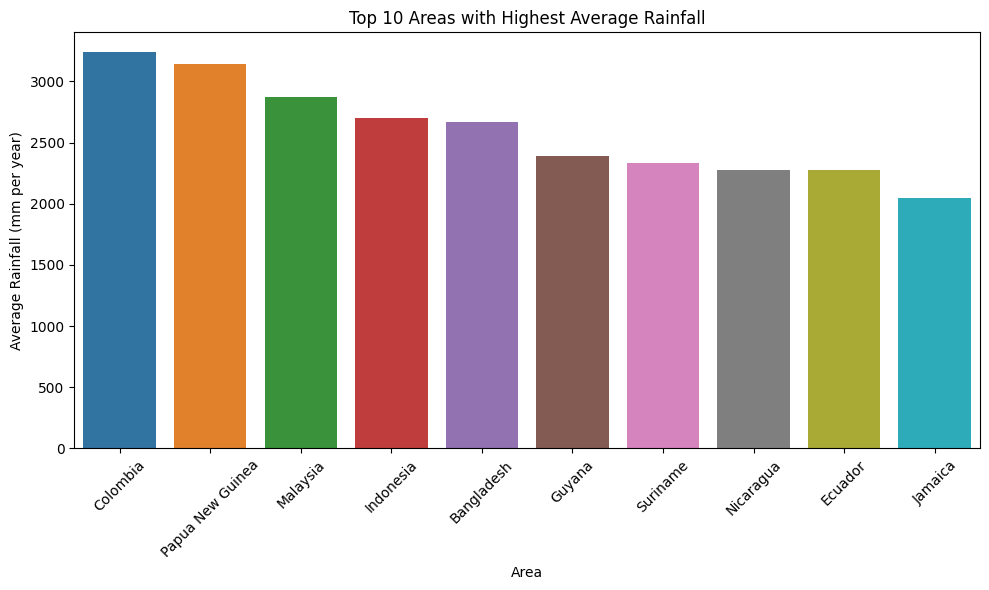

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(data=highest_10_areas, x='Area', y='average_rain_fall_mm_per_year')
plt.xlabel('Area')
plt.ylabel('Average Rainfall (mm per year)')
plt.title('Top 10 Areas with Highest Average Rainfall')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [37]:
#Let's plot the lowest ones too

In [38]:
lowest_10_areas = aggregated_df.nsmallest(10, 'average_rain_fall_mm_per_year')

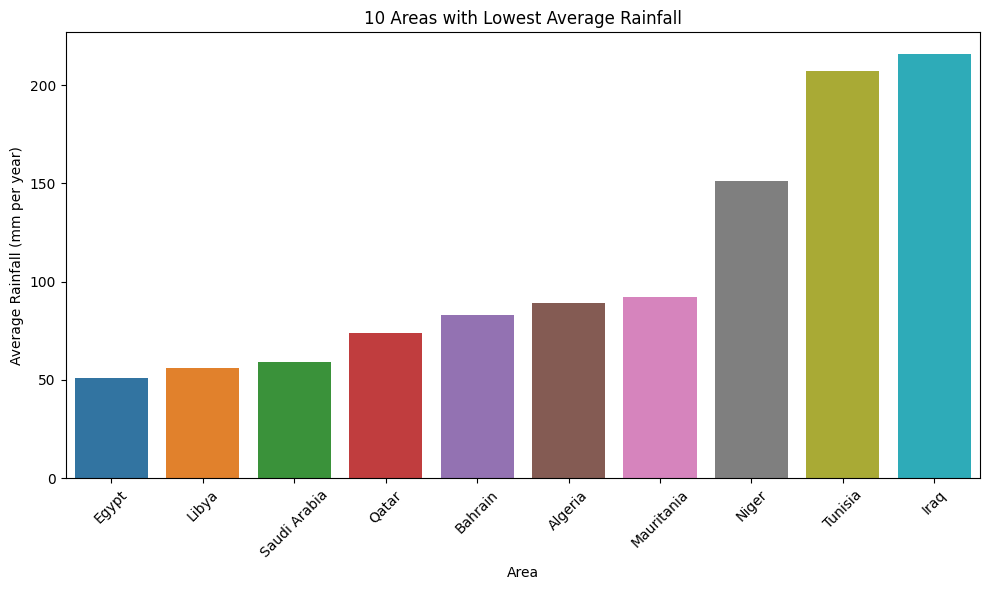

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(data=lowest_10_areas, x='Area', y='average_rain_fall_mm_per_year')
plt.xlabel('Area')
plt.ylabel('Average Rainfall (mm per year)')
plt.title('10 Areas with Lowest Average Rainfall')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [40]:
aggregated_df.describe()

,average_rain_fall_mm_per_year
count,101.000000
mean,1062.613861
std,727.679050
min,51.000000
25%,589.000000
50%,847.000000
75%,1513.000000
max,3240.000000


In [41]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [42]:
#Outliers, Heatmap

In [43]:
df.describe(percentiles=[.10,.25,.50,.75,.90])

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
10%,1992.000000,10415.000000,494.00000,148.680000,10.370000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
90%,2011.000000,200866.100000,2274.00000,79821.180000,27.230000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [44]:
# A values in the range [-1,1] means not skewed.
df.skew(numeric_only=True)

Year                             0.012243
hg/ha_yield                      1.793229
average_rain_fall_mm_per_year    0.853832
pesticides_tonnes                3.490289
avg_temp                        -0.741582
dtype: float64

###### Here we have 'hg/ha_yield' which can be considered as skewed however, let's not do any changes and move forward

C:\Users\Aman Shrivastav\AppData\Local\Temp\ipykernel_21512\1030116736.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


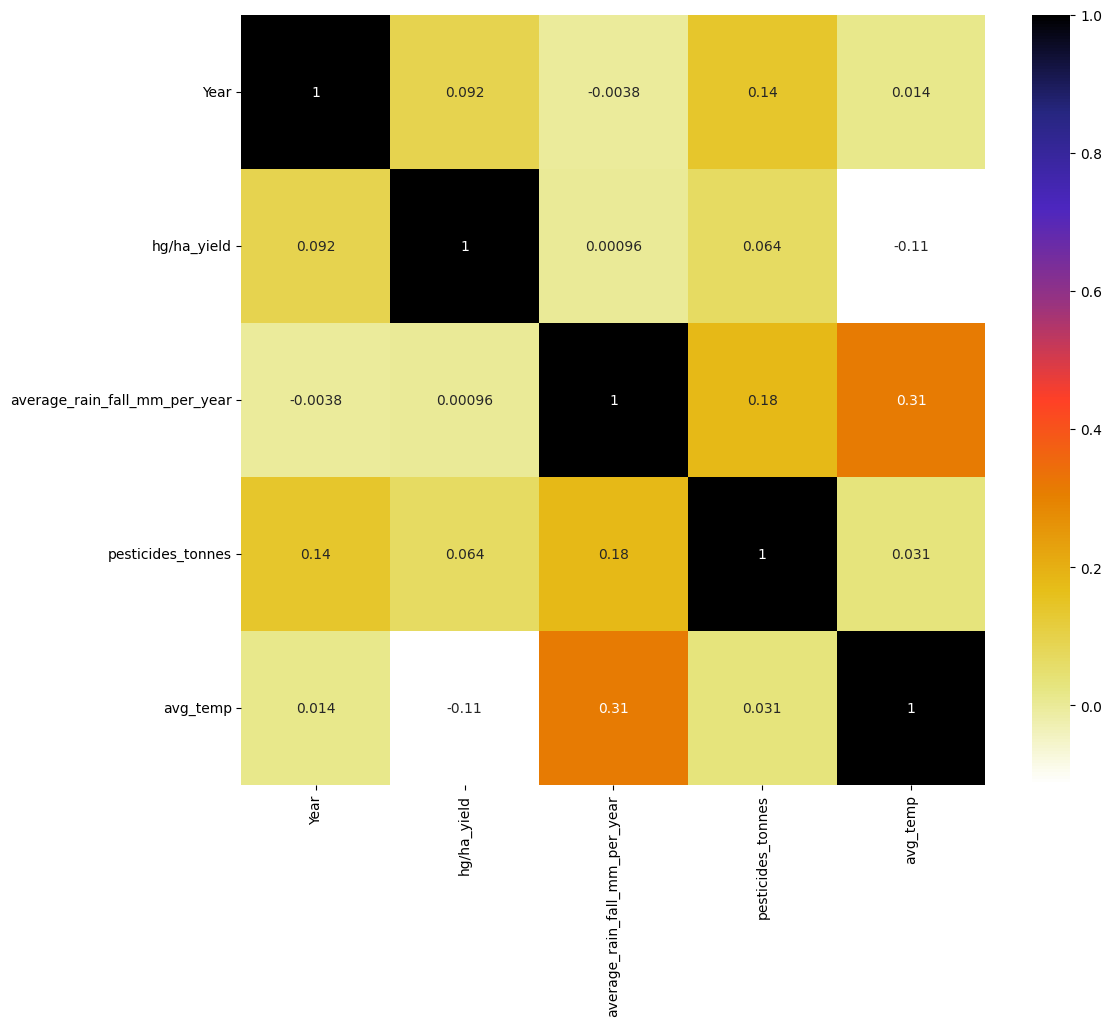

In [45]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [46]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


<AxesSubplot: xlabel='count', ylabel='Area'>

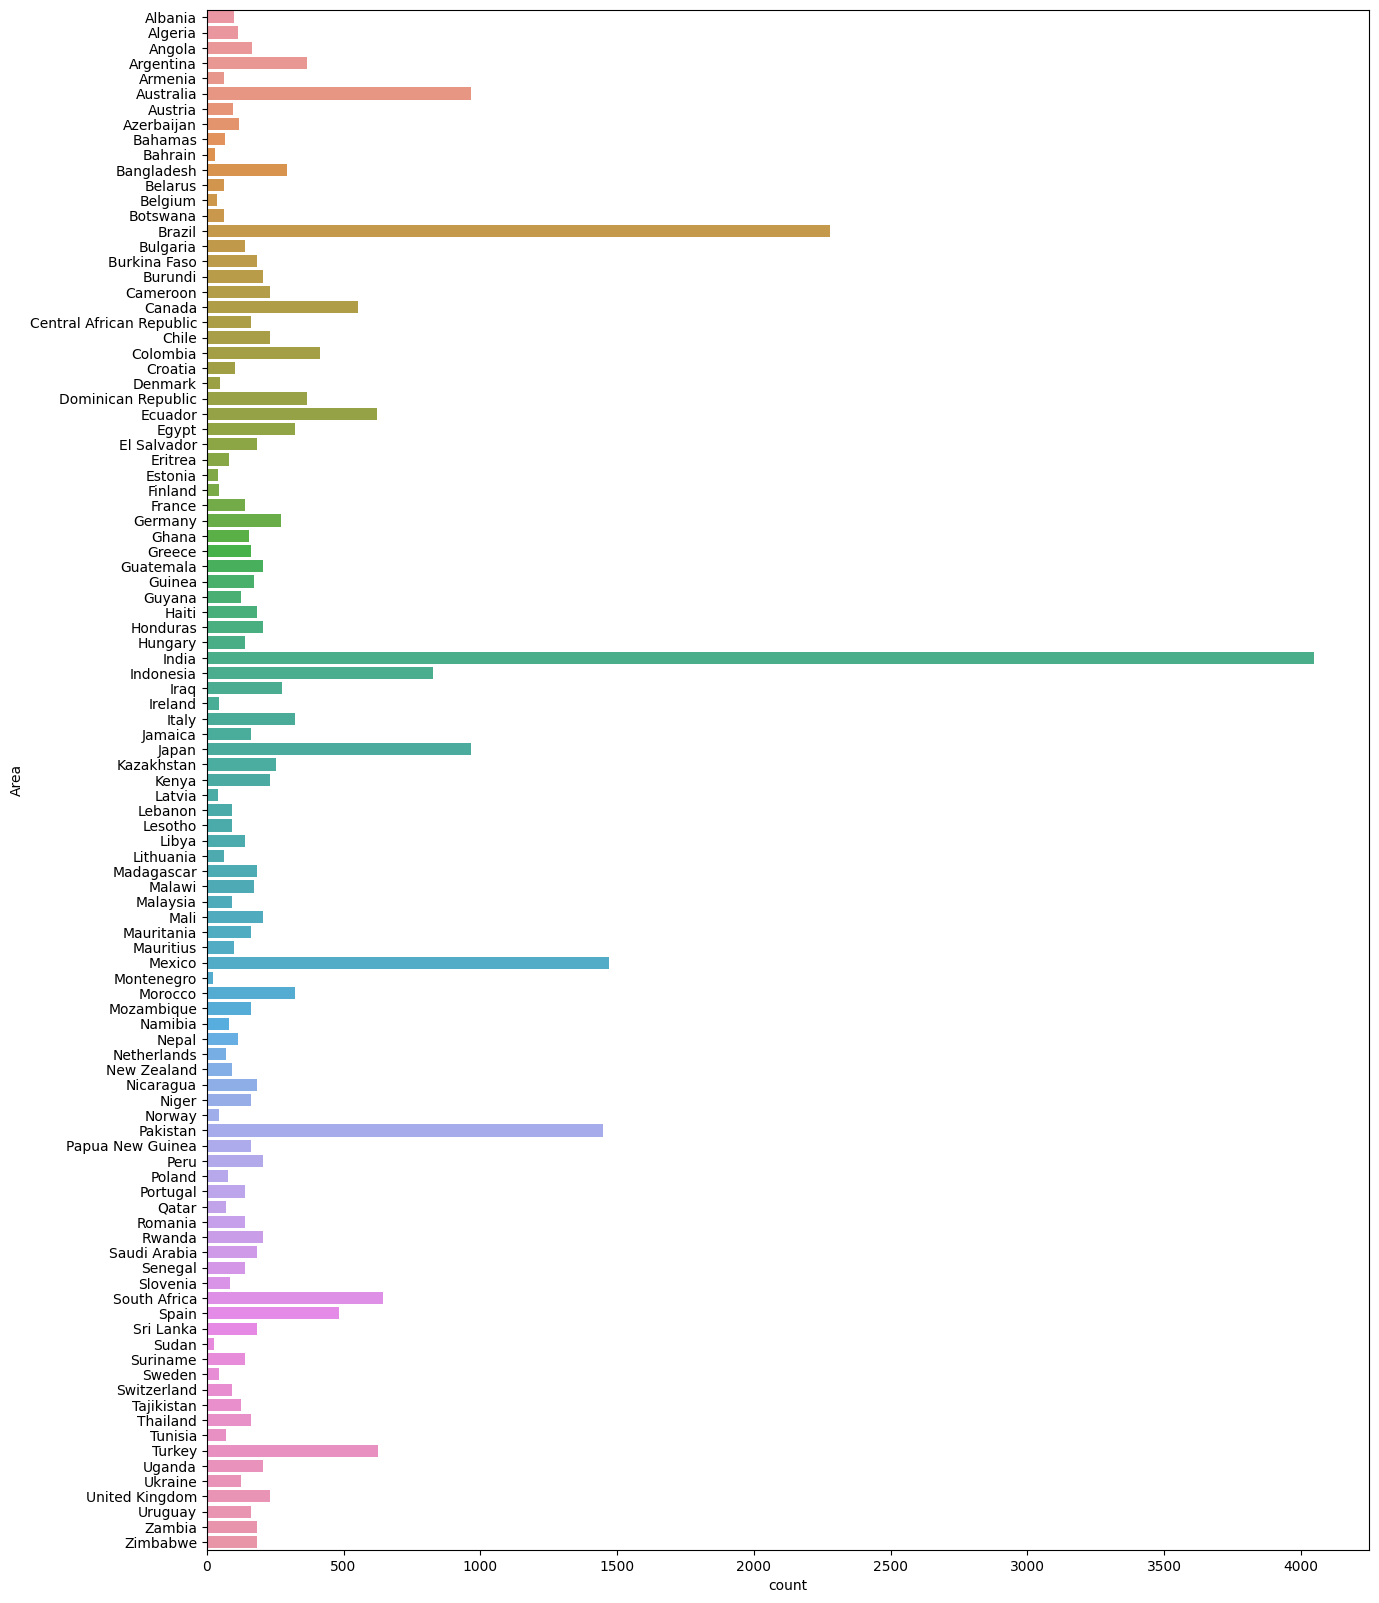

In [47]:
plt.figure(figsize=(15, 20))
sns.countplot(y=df['Area'])

In [48]:
df.shape

(28242, 7)

In [50]:
df = df.rename(index=str, columns={"year": "Year", "hg/ha_yield":'Yield',"avg_temp":'Temperature','pesticides_tonnes':'Pesticides'})
df.head()

,Area,Item,Year,Yield,average_rain_fall_mm_per_year,Pesticides,Temperature
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [51]:
df = df.rename(index=str, columns={"average_rain_fall_mm_per_year": "Avg. Rain fall"})

In [52]:
df.head()

,Area,Item,Year,Yield,Avg. Rain fall,Pesticides,Temperature
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [53]:
df.groupby('Item').count()

,Area,Year,Yield,Avg. Rain fall,Pesticides,Temperature
Item,,,,,,
Cassava,2045,2045,2045,2045,2045,2045
Maize,4121,4121,4121,4121,4121,4121
Plantains and others,556,556,556,556,556,556
Potatoes,4276,4276,4276,4276,4276,4276
"Rice, paddy",3388,3388,3388,3388,3388,3388
Sorghum,3039,3039,3039,3039,3039,3039
Soybeans,3223,3223,3223,3223,3223,3223
Sweet potatoes,2890,2890,2890,2890,2890,2890
Wheat,3857,3857,3857,3857,3857,3857


In [54]:
df.head()

,Area,Item,Year,Yield,Avg. Rain fall,Pesticides,Temperature
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [55]:
from sklearn.preprocessing import OneHotEncoder

In [56]:
final_df_onehot = pd.get_dummies(df, columns=['Area',"Item"], prefix = ['Country',"Item"])
features=final_df_onehot.loc[:, final_df_onehot.columns != 'Yield']
label=df['Yield']
features.head()

,Year,Avg. Rain fall,Pesticides,Temperature,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [57]:
features = features.drop(['Year'], axis=1)

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
features=scaler.fit_transform(features)
features

array([[4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=20)

In [60]:
from sklearn.metrics import r2_score
def model_comparison(model):
    algorithm_name = model.__class__.__name__
    fit_function=model.fit(x_train,y_train)
    y_pred=fit_function.predict(x_test)
    r2=r2_score(y_test,y_pred)
    return([algorithm_name,r2])

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

models = [
    GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=0),
    RandomForestRegressor(n_estimators=200, max_depth=3, random_state=0),
    DecisionTreeRegressor()
]

In [62]:
train_model=list(map(model_comparison,models)) 

In [63]:
print(*train_model, sep = "\n")

['GradientBoostingRegressor', 0.9014845586927979]
['RandomForestRegressor', 0.6932741722155311]
['DecisionTreeRegressor', 0.9607813075856249]
